## Free time series data at provider pages

<span style='color:red;background-color:yellow;font-weight:bold'>^^^ move all data files of all notebooks to 'data', update all data download instructions and all code accordingly</span>

<span style='color:red;background-color:yellow;font-weight:bold'>^^^ missing module: statsmodels</span>

<span style='color:red;background-color:yellow;font-weight:bold'>^^^ add two tasks at the end</span>

<span style='color:red;background-color:yellow;font-weight:bold'>^^^ math clarify diff of AC and PAC</span>


### List of selected data sets

<span style='color:red;background-color:yellow;font-weight:bold'>^^^ explain which data files need to be downloaded</span>

| Source | Name, Link to page | Type | Further information |
| :--- | :--| :--- | :-- |
| [Yahoo Finance](https://finance.yahoo.com) | [Walmart stock price](https://finance.yahoo.com/quote/WMT/history) | Equity | Retail, Big capitalization |
| &nbsp; | [Amazon](https://finance.yahoo.com/quote/AMZN/history) | &nbsp; | IT, Big cap |
| &nbsp; | [Tesla](https://finance.yahoo.com/quote/TSLA/history) | &nbsp; | New technology |
| &nbsp; | [BJ's Restaurants](https://finance.yahoo.com/quote/BJRI/history) | &nbsp; | Catering industry, Small cap |
| &nbsp; | [Bitcoin](https://finance.yahoo.com/quote/BTC-USD/history) | Crypto |  Meant for payments | 
| &nbsp; | [Ethereum](https://finance.yahoo.com/quote/ETH-USD/history) | &nbsp; | More infrastructural | 
| [FRED](https://fred.stlouisfed.org) | Employment: [Not seasonally adjusted](https://fred.stlouisfed.org/series/PAYNSA)<br/>and [Seasonally adjusted](https://fred.stlouisfed.org/series/PAYEMS) | Macroeconomy | Total non-farm employees |
| &nbsp; | [S&P500 stock market index](https://fred.stlouisfed.org/series/SP500) | Equity index |  Large cap stocks |
| &nbsp; | [USD 2Y swap rate ICE](https://fred.stlouisfed.org/series/ICERATES1100USD2Y) | Rate | [ICE methodology](https://www.theice.com/publicdocs/ICE_Swap_Rate_Full_Calculation_Methodology.pdf) |
| &nbsp; | [Ounce of gold in USD](https://fred.stlouisfed.org/series/GOLDAMGBD228NLBM) | Commodity | Gold: bullion |
| &nbsp; | [Moody's AAA 10Y credit spread](https://fred.stlouisfed.org/series/AAA10Y) | Credit | Spread to 10Y T-bond |
| &nbsp; | [YEN / USD exchange rate](https://fred.stlouisfed.org/series/DEXJPUS) | FX | FX: Foreign Exchange | 
| &nbsp; | [Wilshire US Real Estate Securities Price Index](https://www.wilshire.com/indexes/wilshire-real-estate-family/wilshire-us-resi)  | Real estate index | [Wilshire's description](https://www.wilshire.com/indexes/wilshire-real-estate-family/wilshire-us-resi) |
| [ECB](https://sdw.ecb.europa.eu) | [USD / EUR exchange rate](https://sdw.ecb.europa.eu/quickview.do?SERIES_KEY=120.EXR.D.USD.EUR.SP00.A) | FX | ECB reference rate |
| [Portfolio.hu](https://www.portfolio.hu/adatletoltes) | OTP | Equity | Banking, Regional |
| &nbsp; | Richter | &nbsp; | Pharma |
| &nbsp; | BUX | Equity Index | Budapest Stock Exch |
| &nbsp; | EUR / HUF | FX | Hu Natl Bank |

### Task: Getting to know the data sets
1. Based on the descriptions at the provider pages, explain what each data set means.

2. Select two data sets and compare their changes at time points when something happened in the world.


## Investigate the data locally

1. For Yahoo and FRED data sets, explain the meaning of each column.
2. For each Yahoo data set calculate the median / maximum ratio of the daily Volume shown in the last column. Which data set has the lowest ratio ?


In [1]:
# open/close code
import warnings
warnings.filterwarnings('ignore')

# modules, variables
import pandas as pd
import os
data_dir = 'data'
file_ext = 'csv'
df = {}  # data frames by data set code

# Time series from: Yahoo Finance, Federal Reserve Economic Data, European Central Bank, Portfolio.hu
yahooCodes = ['WMT','AMZN','TSLA','BJRI','BTC-USD','ETH-USD']
fred_codes = ['PAYEMS','PAYNSA','AAA10Y','DEXJPUS','GOLDPMGBD228NLBM','ICERATES1100USD1Y','SP500','WILLRESIPR']
ecb_codes = ['EXR.D.USD.EUR.SP00.A']
pf_codes = ['BUX','OTP','RICHTER']
all_codes = yahooCodes + fred_codes + ecb_codes + pf_codes

# Investigate each data frame
for code in all_codes:
    df[code] = pd.read_csv(os.path.join(data_dir, code + '.' + file_ext))
#     print(os.linesep+"> "+code)
#     print(df[code].head())
#     print(df[code].tail())
#     print(df[code].describe())

## Plot value. Plot Daily and Monthly log return.

1. Noting that the vertical scale is logarithmic, which stocks have had long periods of exponential growth ?
2. In which year did WMT (Walmart) have bigger changes relative to itself: 1975 or 2005 ?

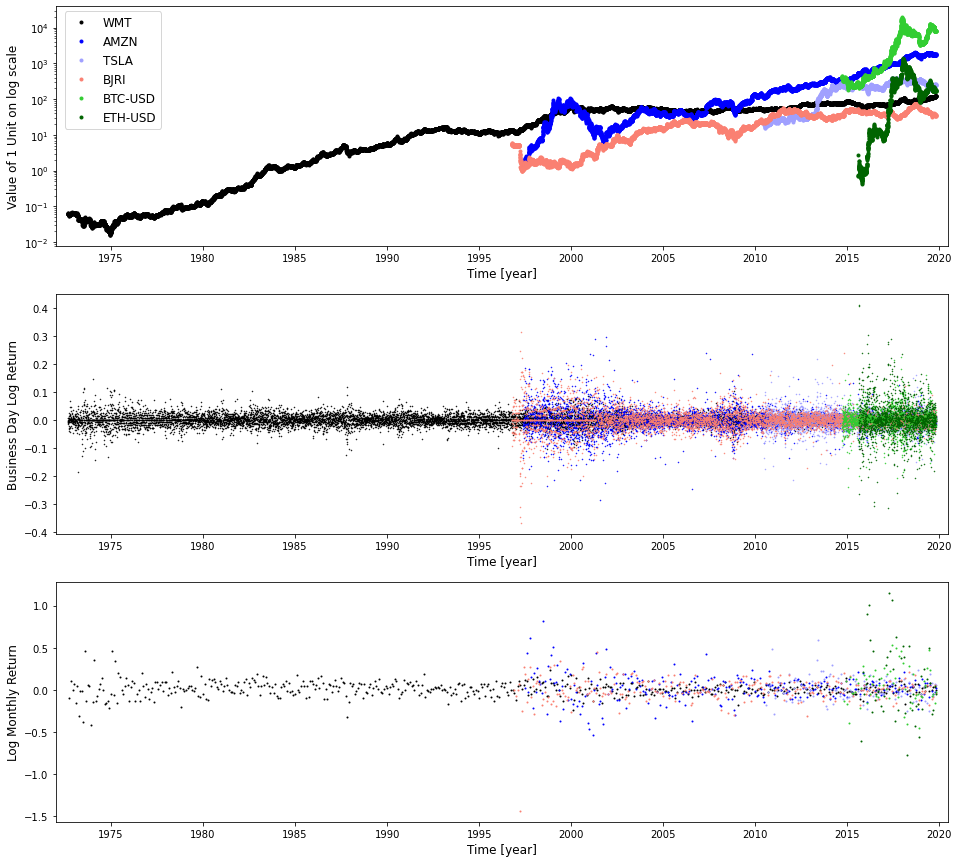

In [2]:
# open/close code
# modules, variables
import matplotlib.pyplot as plt
import datetime
import numpy as np

def last_date_in_each_month(businessDays):
    '''Get last date in each month of a time series'''
    dateRange = []  
    tempYear = None  
    dictYears = businessDays.groupby(businessDays.year)
    for yr in dictYears.keys():
        tempYear = pd.DatetimeIndex(dictYears[yr]).groupby(pd.DatetimeIndex(dictYears[yr]).month)
        for m in tempYear.keys():
            dateRange.append(max(tempYear[m]))
    return dateRange

# set dataframe index to datetime
for code in yahooCodes:
    df[code].index = pd.to_datetime( df[code]['Date'] )

# create dataframe of monthly returns
dfm = dict() # dict to save monthly close data by data set key
for code in yahooCodes:    
    all_dates = df[code].index
    month_last_dates = last_date_in_each_month(all_dates)
    dfm[code] = pd.DataFrame(df[code], index=month_last_dates)

# daily and monthly log return
for code in yahooCodes:
    df[code]['LogReturn']  = np.log(df[code]['Close']) -  np.log(df[code]['Close'].shift())
    dfm[code]['LogReturn'] = np.log(dfm[code]['Close']) - np.log(dfm[code]['Close'].shift())

# parameters for drawing
xlims=[datetime.date(1971,12,31),datetime.date(2020,6,30)] # horizontal axis limits
ylims=[-.45,.45]
removeOutlierBelowMinusOne = True # whether we should remove the log daily return outlier
yahooColors = ['black','blue','#a0a0ff','salmon','limegreen','darkgreen']
fontsize=12
marker='.'

# plot daily values
plt.subplot(311)
for code,color in zip(yahooCodes,yahooColors):
    plt.plot(df[code]['Close'], c=color, marker=marker, label=code, lw=0)
plt.legend(bbox_to_anchor=(0.01, .98), loc=2, borderaxespad=0., fontsize=fontsize)
plt.yscale('log')
plt.xlabel('Time [year]',fontsize=fontsize)
plt.ylabel('Value of 1 Unit on log scale',fontsize=fontsize)
plt.xlim(xlims)

# plot logarithmic daily returns
plt.subplot(312)
for code,color in zip(yahooCodes,yahooColors):
    s = df[code]['LogReturn']
    if removeOutlierBelowMinusOne:
        s = s[s>-1]
    plt.plot(s, c=color, marker='.', ms=1, label=code, lw=0)
plt.yscale('linear')
plt.xlabel('Time [year]', fontsize=fontsize)
plt.ylabel('Business Day Log Return', fontsize=fontsize)
plt.xlim(xlims)
#plt.ylim(ylims)

# plot logarithmic monthly returns
plt.subplot(313)
normalization_factor = 1.0 # / np.sqrt(number_of_business_days_per_month)
number_of_business_days_per_month = 21
for code,color in zip(yahooCodes,yahooColors):
    s = dfm[code]['LogReturn']
    plt.plot(s * normalization_factor, c=color, marker='.', ms=2, label=code, lw=0)
plt.yscale('linear')
plt.xlabel('Time [year]', fontsize=fontsize)
#plt.ylabel('Log Monthly Return / ' + r'$\sqrt{' + str(number_of_business_days_per_month) + r'}$', fontsize=fontsize)
plt.ylabel('Log Monthly Return', fontsize=fontsize)
plt.xlim(xlims)
#plt.ylim(ylims)

fig = plt.gcf()
fig.set_size_inches([16, 15])
plt.show()

## Log return distribution vs Normal
1. On which time scale is BTC closer to normal: daily log returns or monthly log returns ?
2. Can you find any data errors, for example, cutoff around zero ?

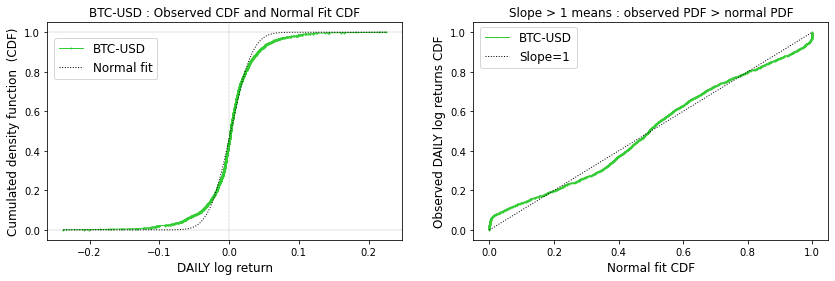

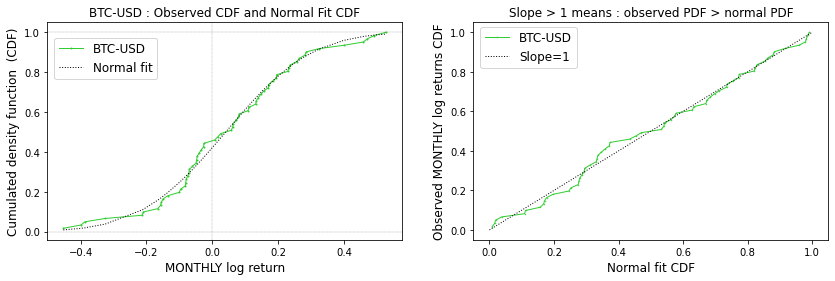

In [3]:
# open/close code
# selected data set for plotting
selectedCode = 'BTC-USD'

# import modules
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import erf
# from scipy.stats import norm # only for norm.ppf
import pandas as pd
# select color for the data set
code2num = { yahooCodes[num]:num for num in np.arange(len(yahooColors)) }
selectedColor = yahooColors[code2num[selectedCode]]
fontsize=12

# helper functions
def cdf(series):
    '''Calculate CDF (cumulated density function)'''
    series_dropna = series.dropna()
    series_dropna_sorted = np.sort(series_dropna)
    n = series_dropna.size
    values = np.arange(1, n+1) / n
    return(series_dropna_sorted, values)

def func_normal_cdf(x, mu, sigma): 
    '''CDF of normal distribution with parameters mu,sigma'''
    return 0.5 * ( 1.0 + erf((x-mu)/(sigma*np.sqrt(2.0))) ) 

# plot DAILY and MONTHLY
for which_period in (["DAILY", "MONTHLY"]):
    dfsel = dict()
    if which_period == "DAILY":
        for key in df:
            dfsel[key] = df[key].copy()
    else:
        for key in dfm:
            dfsel[key] = dfm[key].copy()
            
    # Left: one selected time series as an example
    cdfx, cdfy = cdf(dfsel[selectedCode]['LogReturn']) # CDF of daily log returns
    popt, pcov = curve_fit(func_normal_cdf, cdfx, cdfy) # fit normal's CDF to observed CDF
    cdfy_fit = func_normal_cdf(cdfx, *popt) # CDF fit points
    plt.subplot(121)
    plt.xlabel(which_period + " log return", fontsize=fontsize)
    plt.ylabel("Cumulated density function  (CDF)", fontsize=fontsize)
    plt.title(selectedCode + " : Observed CDF and Normal Fit CDF", fontsize=fontsize)
    plt.plot(cdfx, cdfy, c=selectedColor, marker='o', label=selectedCode, markersize=1, lw=1)
    plt.plot(cdfx, cdfy_fit, c='k', ls=':', label='Normal fit',lw=1)
    plt.legend(bbox_to_anchor=(.02, .93), loc=2, borderaxespad=0., fontsize=fontsize)
    plt.axhline(0, c='k', ls=':', lw=.3)
    plt.axhline(1, c='k', ls=':', lw=.3)
    plt.axvline(0, c='k', ls=':', lw=.3)

    # Right panel: Plot only selected or Plot all
    plt.subplot(122)
    for code,color in zip(yahooCodes,yahooColors):
        #if True:
        if code == selectedCode: # plot the CDF-CDF only for the selected data set, use True to plot for all
            cdfx, cdfy = cdf(dfsel[code]['LogReturn']) # CDF of daily log returns
            popt, pcov = curve_fit(func_normal_cdf, cdfx, cdfy) # fit normal's CDF to observed CDF
            cdfy_fit = func_normal_cdf(cdfx, *popt) # CDF fit points
            plt.plot(cdfy_fit,cdfy,c=color, marker='.', label=code, markersize=1, lw=1)
    plt.title("Slope > 1 means : observed PDF > normal PDF", fontsize=fontsize)
    plt.xlabel("Normal fit CDF", fontsize=fontsize)
    plt.ylabel("Observed " + which_period + " log returns CDF", fontsize=fontsize)
    plt.plot([0,1],[0,1],"k:",lw=1,label="Slope=1")
    plt.legend(bbox_to_anchor=(0.02, .98), loc=2, borderaxespad=0., fontsize=fontsize)
    fig = plt.gcf()
    fig.set_size_inches([14, 4])
    plt.show()

## Log return and Abs value of log return

1. The number beside each symbol shows 1-step autocorrelation, for example, WMT (0.055). Which ticker's log return has negative autocorrelation ?
2. When we switch from log return to the abs value of log return, how does the autocorrelation change ?

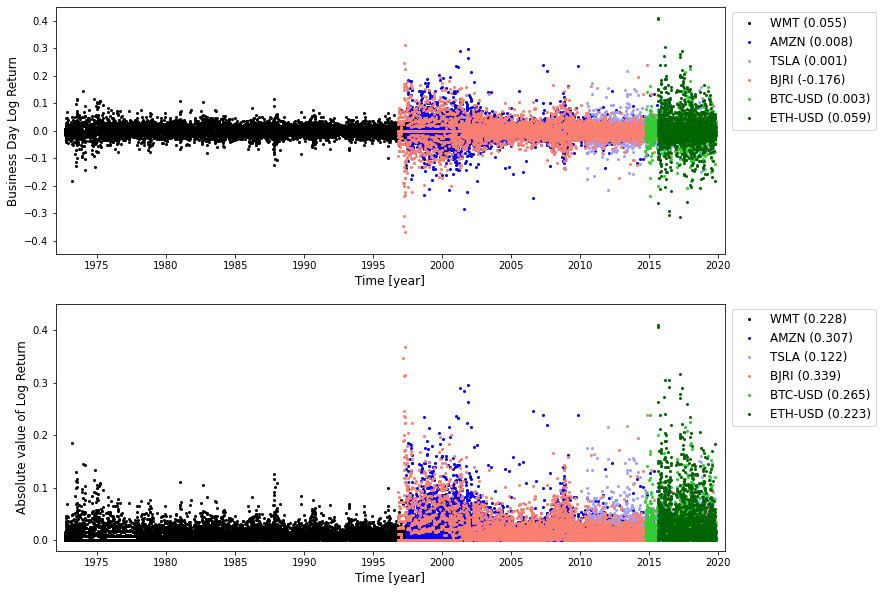

In [4]:
# open/close code
import matplotlib.pyplot as plt
ylims=[-.45,.45]
abs_ylims=[-.02,.45]
fontsize=12
marker='o'
markersize=2

# daily log return
plt.subplot(211)
for code,color in zip(yahooCodes,yahooColors):
    s = df[code]['LogReturn']
    autocorr = '%.3f' % s.autocorr()
    plt.plot(s, c=color, marker=marker, ms=markersize, label = code + " (" + str(autocorr) + ")", lw=0)
plt.legend(bbox_to_anchor=(1.01, .98), loc=2, borderaxespad=0., fontsize=fontsize)
plt.yscale('linear')
plt.xlabel('Time [year]', fontsize=fontsize)
plt.ylabel('Business Day Log Return', fontsize=fontsize)
plt.xlim(xlims)
plt.ylim(ylims)

# absolute value of log return
plt.subplot(212)
for code,color in zip(yahooCodes,yahooColors):
    s = np.absolute(df[code]['LogReturn'])
    autocorr = '%.3f' % s.autocorr()
    plt.plot(s, c=color, marker=marker, ms=markersize, label = code + " (" + str(autocorr) + ")", lw=0)
plt.legend(bbox_to_anchor=(1.01, .98), loc=2, borderaxespad=0., fontsize=fontsize)
plt.yscale('linear')
plt.xlabel('Time [year]', fontsize=fontsize)
plt.ylabel('Absolute value of Log Return', fontsize=fontsize)
plt.xlim(xlims)
plt.ylim(abs_ylims)

fig = plt.gcf()
fig.set_size_inches([12, 10])
plt.show()

## Autocorr of log return and abs log return

These plots show autocorrelation vs time difference. 

1. Which daily log return has significantly nonzero autocorrelation ?
2. Which abs daily log return has the highest and lowest autocorrelation after long time ?


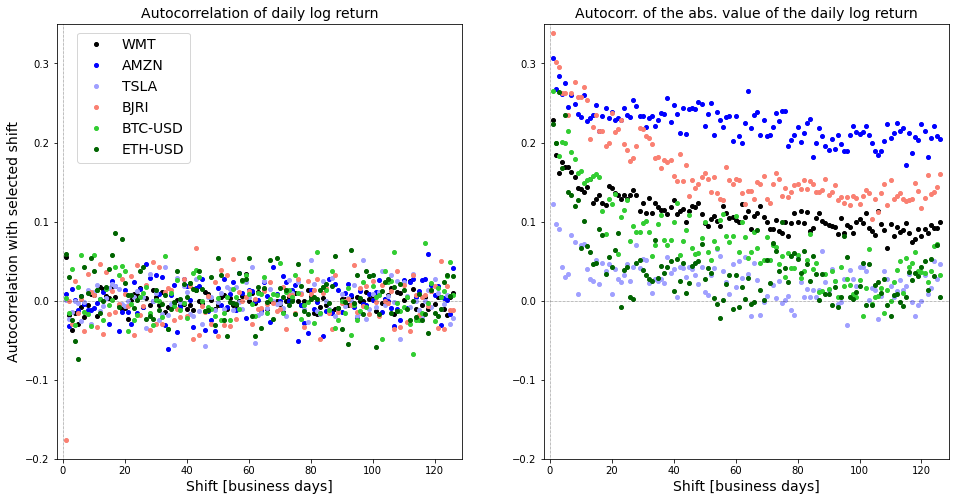

In [5]:
# open/close code
# main parameters
autocorr_len = 126 # check autocorrelation up to this number of business days
xmargin_of_plot = 3
autocorr_shifts = np.arange( 1 , autocorr_len + 1 )

# imports and other parameters
import matplotlib.pyplot as plt
fontsize =14
marker = 'o'
markersize = 4   
xlims = ( 1 - xmargin_of_plot, autocorr_len + xmargin_of_plot)
ylims = ( -.2, .35 )
axhline_width = 0.5

# daily log return
plt.subplot(121)
for code,color in zip(yahooCodes,yahooColors):
    s = df[code]['LogReturn']
    autocorr = [ float( '%.3f' % s.autocorr(shift) ) for shift in autocorr_shifts ]
    plt.plot(autocorr_shifts, autocorr, c=color, marker=marker, ms=markersize, label=code, lw=0)
plt.legend(bbox_to_anchor=(.05, .98), loc=2, borderaxespad=0., fontsize=fontsize)
plt.title("Autocorrelation of daily log return", fontsize=fontsize)
plt.yscale('linear')
plt.xlabel('Shift [business days]', fontsize=fontsize)
plt.ylabel('Autocorrelation with selected shift', fontsize=fontsize)
plt.axhline(0, c='k', ls=':', lw=axhline_width)
plt.axvline(0, c='k', ls=':', lw=axhline_width)
plt.xlim(xlims)
plt.ylim(ylims)

# daily log return
plt.subplot(122)
for code,color in zip(yahooCodes,yahooColors):
    s = np.absolute(df[code]['LogReturn'])
    autocorr = [ float( '%.3f' % s.autocorr(shift) ) for shift in autocorr_shifts ]
    plt.plot(autocorr_shifts, autocorr, c=color, marker=marker, ms=markersize, lw=0)
plt.title("Autocorr. of the abs. value of the daily log return", fontsize=fontsize)
plt.yscale('linear')
plt.xlabel('Shift [business days]', fontsize=fontsize)
plt.axhline(0, c='k', ls=':', lw=axhline_width)
plt.axvline(0, c='k', ls=':', lw=axhline_width)
plt.xlim(xlims)
plt.ylim(ylims)

fig = plt.gcf()
fig.set_size_inches([16, 8])
plt.show()

## Volume vs log Return

1. What do you conclude from daily log return vs traded volume plotted for each day ?
2. What do you conclude when points are binned by log return ?

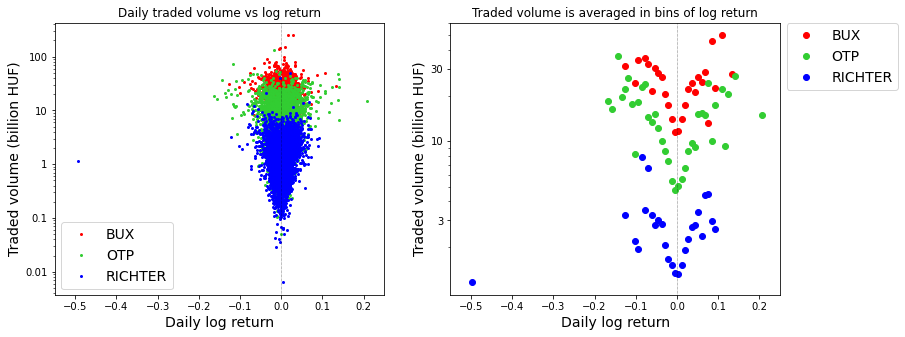

In [6]:
# open/close code
# the portfolio.hu time series contain trading volume
# we are assuming here that the data sets are already imported
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pf_colors = ['red','limegreen','blue']
markersize=2
(xmin, xmax) = ( -0.55, 0.25 )
xlims = (xmin, xmax)
xbins = np.linspace(xmin, xmax, 100)
axvline_width = 0.5
marker='o'

# set index to datetime, set closing value, log return, and traded volume
for code in pf_codes:
    df[code].index = pd.to_datetime( df[code]['Dátum'] )
    df[code]['Close'] = df[code]['Záró ár']
    df[code]['LogReturn']  = np.log(df[code]['Close']) -  np.log(df[code]['Close'].shift())
    df[code]['Volume'] = df[code]['Forgalom (mFt)']

# plot daily values
plt.subplot(121)
for code,color in zip(pf_codes, pf_colors):
    if True: # plot all data sets
    #if 'RICHTER' == code: # plot selected data set
        plt.plot(df[code]['LogReturn'], df[code]['Volume'] / 1e+9, 
                 c=color, marker=marker, label=code, lw=0, markersize=markersize)
plt.xlim(xlims)
plt.title("Daily traded volume vs log return")
plt.legend(bbox_to_anchor=(.02, .02), loc=3, borderaxespad=0., fontsize=fontsize)
plt.yscale('log')
plt.xlabel('Daily log return', fontsize=fontsize)
plt.ylabel('Traded volume (billion HUF)', fontsize=fontsize)
plt.yticks([0.01,0.1,1,10,100],['0.01','0.1','1','10','100'])
plt.axvline(0, c='k', ls=':', lw=axvline_width)

plt.subplot(122)
for code,color in zip(pf_codes, pf_colors):
    if True: # plot all data sets
    #if 'RICHTER' == code: # plot selected data set
        groups = df[code].groupby(pd.cut(df[code]['LogReturn'], xbins))
        plot_centers = ( xbins[:-1] + xbins[1:] ) / 2
        plot_values = groups['Volume'].mean() / 1e+9
        plt.plot(plot_centers, plot_values,
                 c=color, marker=marker, label=code, lw=0, markersize=3*markersize)
plt.xlim(xlims)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=fontsize)
plt.title("Traded volume is averaged in bins of log return")
plt.yscale('log')
plt.xlabel('Daily log return', fontsize=fontsize)
plt.ylabel('Traded volume (billion HUF)', fontsize=fontsize)
plt.yticks([3,10,30],['3','10','30'])
plt.axvline(0, c='k', ls=':', lw=axvline_width)

fig = plt.gcf()
fig.set_size_inches([13, 5])
plt.show()

## Volume vs Volatility of daily close

1. Based on the below scatter plot what do you conclude for the relationship between daily log(volume) and log(volatility) ?
2. Based on the roughly even distribution of the daily points in the plot what is your chance of having a high volume day ?

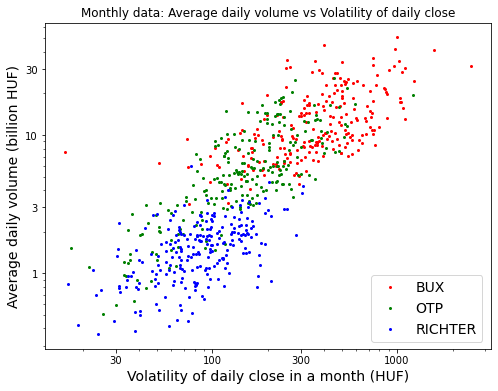

In [7]:
# open/close code
# imports, parameters
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pf_colors = ['red','green','blue']
markersize = 2

def calculate_monthly_volatility_and_average_traded_volume(data):
    '''For each month calculate the volatility of the daily close and the average daily traded volume.'''
    monthly_data = pd.DataFrame(columns=['volatility','average_volume'])
    dates = data.index    
    yearly_dates = dates.groupby(dates.year)
    for year in yearly_dates.keys():
        monthly_dates = pd.DatetimeIndex(yearly_dates[year]).groupby(pd.DatetimeIndex(yearly_dates[year]).month)
        for month in monthly_dates.keys():
            date_all = monthly_dates[month]
            date_first = min( date_all )
            close_daily_all = [ data.loc[date]['Close'] for date in date_all ]
            volume_daily_all = [ data.loc[date]['Volume'] for date in date_all ]
            volatility = np.std( close_daily_all )
            volume_daily_average = np.average( volume_daily_all )
            monthly_data.loc[date_first] = [volatility, volume_daily_average]
    return monthly_data

# volume vs volatility
monthly_data = dict()
for code, color in zip(pf_codes, pf_colors):
    if True: # all data sets
    #if 'RICHTER' == code: # only selected data set
        monthly_data[code] = calculate_monthly_volatility_and_average_traded_volume( df[code] )
        plt.plot(monthly_data[code]['volatility'], monthly_data[code]['average_volume'] / 1e+9,
                 c=color, marker=marker, label=code, lw=0, markersize=markersize)
plt.legend(bbox_to_anchor=(.98, .02), loc=4, borderaxespad=0., fontsize=fontsize)
plt.title("Monthly data: Average daily volume vs Volatility of daily close")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Volatility of daily close in a month (HUF)', fontsize=fontsize)
plt.ylabel('Average daily volume (billion HUF)', fontsize=fontsize)
plt.xticks([30,100,300,1000],['30','100','300','1000'])
plt.yticks([1,3,10,30],['1','3','10','30'])

fig = plt.gcf()
fig.set_size_inches([8, 6])
plt.show()

## Skewness of log returns distribution 

1. What does the sum of the highest and the lowest value tell about a distribution ?
2. Does the negative skew of SP500 mean that stock prices respond faster to negative news than to positive news ?

| Name | Symbol and Calculation |
|:-----|:------------|
| Random variable | $X$ |
| Mean | $\mu = E\left[ \,X \,\right]$ |
| Variance | ${\displaystyle \sigma^{\,2} = E\left[ \, \left( \, X - \mu \, \right)^{\,2} \, \right] }$ |
| Volatility = Std.dev. | $\sigma$ |
| Skewness | ${\displaystyle E\left[\,\left(\frac{X-\mu}{\sigma}\,\right)^{\,3} \, \right]}$|

Skew	Label	Long Code of Data
+3.02	AAA10Y	AAA10Y
+0.08	GOLD	GOLDPMGBD228NLBM
-0.38	JPYUSD	DEXJPUS
-0.64	US1YSW	ICERATES1100USD1Y
-0.55	SP500	SP500
-0.18	WILLSH	WILLRESIPR


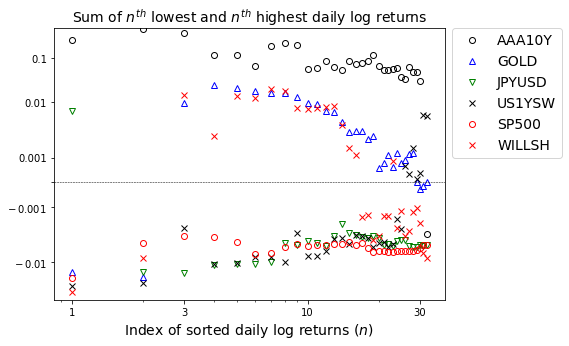

In [8]:
# open/close code
import numpy as np
import pandas as pd
from scipy import stats
import datetime

# select data sets to be analyzed, set their display names, set colors for plotting them
fred_selected_codes = {'AAA10Y':'AAA10Y', 'GOLDPMGBD228NLBM':'GOLD', 'DEXJPUS':'JPYUSD', 
    'ICERATES1100USD1Y': 'US1YSW', 'SP500':'SP500', 'WILLRESIPR':'WILLSH'}
fred_colors = ['black','blue','green','black','red','red']
fred_markers = ['o','^','v','x','o','x']
fred_fill = ['none','none','none','none','none','none']
axhline_width = 0.5 
markersize = 6
markeredgewidth = 1
display_len = 32 # display this number of points
linthreshy = 0.002 # threshold for the simlog y scaling


# read fred data sets again without the . lines, calculate log return
for code in fred_selected_codes:
    df[code] = pd.read_csv(data_dir + os.sep + code + "." + file_ext, na_values='.')
    df[code]['LogReturn'] = np.log(df[code][code]) - np.log(df[code][code]).shift()


# write skewness and plot differences
print("Skew\tLabel\tLong Code of Data")
for code, color, marker, fill in zip(fred_selected_codes, fred_colors, fred_markers, fred_fill):
    if True: # plot all data
    #if code.startswith('AA'): # plot selected
        log_returns = df[code]['LogReturn']
        log_returns_num = log_returns[ (log_returns>-1e+6) & (log_returns<1e+6) ] # select numbers
        sorted_log_returns = pd.Series.sort_values( log_returns_num ).tolist() # sort into ascending order
        sum_reversed = np.add( sorted_log_returns, sorted_log_returns[::-1] ) # add list to itself reversed
        sum_reversed = sum_reversed[:display_len:] # keep only the requested number of items from the start
        display_name = fred_selected_codes[code]
        print("%+.2f\t%s\t%s" % (stats.skew(sorted_log_returns), display_name, code))
        is_first = False
        plt.plot(1 + np.arange(len(sum_reversed)) , sum_reversed,
                 c=color, marker=marker, label=display_name, lw=0, fillstyle=fill, 
                 markersize=markersize, markeredgewidth=markeredgewidth)
plt.title('Sum of $n^{th}$ lowest and $n^{th}$ highest daily log returns', fontsize=fontsize)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=fontsize)
plt.xscale('log')
plt.yscale('symlog', linthreshy=linthreshy)
plt.xlabel('Index of sorted daily log returns ($n$)', fontsize=fontsize)
plt.xticks([1,3,10,30],['1','3','10','30'])
plt.yticks([-0.01,-0.001,0,0.001,0.01,0.1],['$-\,0.01$','$-\,0.001$','','0.001','0.01','0.1'])
plt.axhline(0, c='k', ls='--', lw=axhline_width)

fig = plt.gcf()
fig.set_size_inches([7, 5])
plt.show()

## Autocorrelation vs Partial autocorrelation

This section is optional material.

The PAC at lag $\,k\,$ is the correlation between $\,X(t)\,$ and $\,X(t-k)\,$ after removing the effects of $\,X(t-1)\,$, ... , $\,X(t-k+1)\,$.  

One of the algorithms calculates ordinary least squares (OLS) with regressand $\,X(t)\,$ and the lagged values as regressors.

In [9]:
# open/close code
import pandas as pd
from statsmodels.tsa import stattools
nlags = 10 # number of earlier values used for the PACF
pf_markers = ['o','x','^']
markersize = 6
fill = 'none'
axline_width = 0.5
xticks = [1,2,4,6,8,10]

# calculate ACF and PACF, plot ACF
plt.subplot(121)
data_pacf = dict()
for code, color, marker in zip(pf_codes, pf_colors, pf_markers):
    log_returns = pd.Series( data = np.log(df[code]['Záró ár']) - np.log(df[code]['Záró ár'].shift()) )
    log_returns.dropna(inplace=True)
    data_acf = stattools.acf(log_returns, nlags=nlags)
    data_pacf[code] = stattools.pacf(log_returns, nlags=nlags)
    plt.plot( np.arange(1,nlags+1), data_acf[1:], c=color, marker=marker,
              label=code, lw=0, fillstyle=fill, markersize=markersize )
plt.xlabel('$k\,$ (lag)', fontsize=fontsize)
plt.title('Autocorrelation at lag $k$', fontsize=fontsize)
plt.xticks(xticks)
plt.axhline(0, c='k', ls=':', lw=axline_width)
plt.axvline(1, c='k', ls=':', lw=axline_width)

# plot PACF
plt.subplot(122)
for code, color, marker in zip(pf_codes, pf_colors, pf_markers):
    plt.plot( np.arange(1,nlags+1), data_pacf[code][1:], c=color, marker=marker,
              label=code, lw=0, fillstyle=fill, markersize=markersize )
plt.legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0., fontsize=fontsize)
plt.xlabel('$k\,$ (lag)', fontsize=fontsize)
plt.title('Partial autocorrelation at lag $k$', fontsize=fontsize)
plt.xticks(xticks)
plt.axhline(0, c='k', ls=':', lw=axline_width)
plt.axvline(1, c='k', ls=':', lw=axline_width)

fig = plt.gcf()
fig.set_size_inches([10, 6])
plt.show()    

ModuleNotFoundError: No module named 'statsmodels'

Question: For each year separately, calculate the mean of the daily log return of WMT.


Help: 1. List the years (use one of the columns of the data frame), 2. Use a for loop over the years, 3. For each year calculate the mean daily log return, 4. Print formatted output.


In [ ]:
!ls | grep WMT